### Bootstrapping

Playground for experimenting with bootstrap methods.

References:
- [ThinkStats2 by AllenDowney](https://github.com/AllenDowney/ThinkStats2)
- [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)
- [Article: "Ditch p-values..."](https://towardsdatascience.com/ditch-p-values-use-bootstrap-confidence-intervals-instead-bba56322b522)
- [Intermediate Statistics with R (Greenwood)](https://stats.libretexts.org/Bookshelves/Advanced_Statistics/Intermediate_Statistics_with_R_(Greenwood)/02%3A_(R)e-Introduction_to_statistics/2.09%3A_Confidence_intervals_and_bootstrapping)

In [127]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Let's start with a simple example of a coin flip. Say a coin is tossed X times with Y heads and Z tails resulting. Can we say whether or not the coin is fair?

In [128]:
# head = 1, tail = 0
heads = [1] * 140
tails = [0] * 110
toss = heads + tails

bootstrap_ci = stats.bootstrap((toss,), np.mean, confidence_level=0.95,
                               n_resamples=9999, random_state=42, 
                               method='BCa')
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=0.496, high=0.62)


A fair coin would have a "true" mean value of 0.5 after a number of tosses. I say "true" in quotes to reference the mean of a population of tosses, rather than the mean of the sample size in this case. The bootstrapped confidence interval tells us that we can be 95% confident that the coin's true mean is between 0.496 and 0.62. Because a mean of 0.5 is within the 95% confidence interval (which remember contains 95% of the *means*), we can say that there is no statistically significant difference observed and therefore the coin is fair. I'm attempting to be careful in language here because there is a lot of [confusion](https://en.wikipedia.org/wiki/Confidence_interval#Common_misunderstandings) surrounding the interpretation of confidence intervals (myself included).

**Caveat:** The choice of 95% confidence interval threshold for statistical significance is arbitrary. Such threshold choices should not be considered precise. The best recommendation I've seen is to interpret results based on their order of magnitude. If the value in question is within a 99% confidence interval, the result is unlikely due to chance; if the value is within a 90% confidence interval, the result is possibly due to chance. Anything within 99% and 90% confidence intervals can be considered borderline.

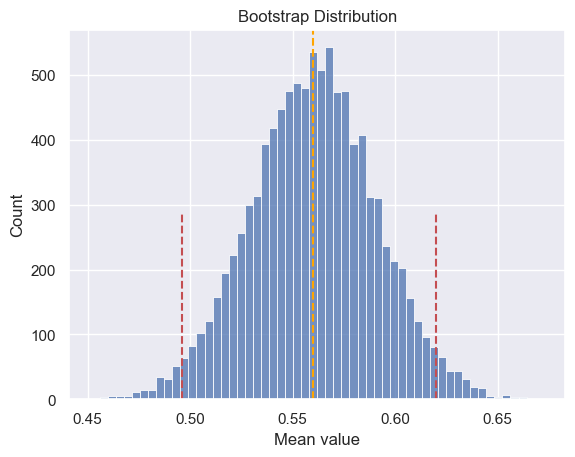

In [129]:
# Visualize the bootstrapped distribution
distribution = bootstrap_ci.bootstrap_distribution
bins = 56
sns.histplot(distribution, bins=bins);
plt.title('Bootstrap Distribution')
plt.xlabel('Mean value')
# show mean and confidence intervals
plt.axvline(np.mean(toss), 0, 1, c='orange', linestyle='--')
ci = bootstrap_ci.confidence_interval
plt.axvline(ci[0], 0, 0.5, c='r', linestyle='--')
plt.axvline(ci[1], 0, 0.5, c='r', linestyle='--')
plt.show()

A bootstrap histogram is an effective visualization for understanding the statistics and expected values. In the plot above, the orange vertical dashed line is the mean from the actual measurement, but it is easy to see all the other possible mean values. Additionally, the red vertical dashed lines represent the bounds for the 95% confidence interval and all mean values outside of the red vertical lines represent results that can be considered statistically significant.

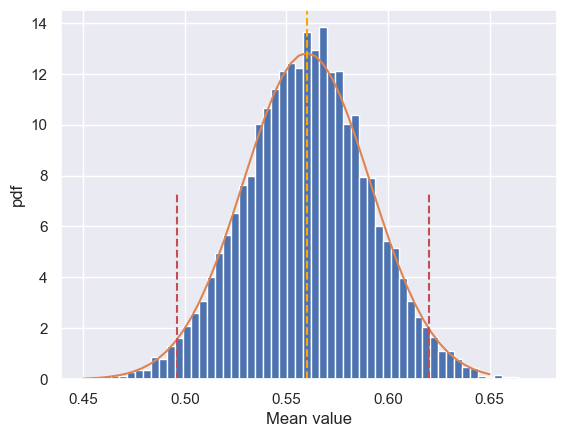

In [130]:
# Same plot with normal distribution overlaid
mean_sample = np.mean(toss)
x = np.linspace(0.45, 0.65)
pdf = stats.norm.pdf(x, loc=mean_sample, scale=bootstrap_ci.standard_error)
plt.hist(distribution, bins=bins, density=True);
plt.plot(x, pdf)
plt.xlabel('Mean value')
plt.ylabel('pdf')
plt.axvline(np.mean(toss), 0, 1, c='orange', linestyle='--')
plt.axvline(ci[0], 0, 0.5, c='r', linestyle='--')
plt.axvline(ci[1], 0, 0.5, c='r', linestyle='--')
plt.show()

For extra practice, let's calculate the bootstrapped confidence intervals manually for comparison.

In [131]:
np.random.seed(seed=42)
toss_mean = []
for _ in range(9999):
    sample_mean = np.random.choice(toss, size=len(toss), replace=True).mean()
    toss_mean.append(sample_mean)

ci_low = np.quantile(toss_mean, 0.025) 
ci_high = np.quantile(toss_mean, 0.975)
print(ci_low, ci_high)

0.5 0.62


As expected, the result of manually computing the bootstrapped confidence intervals is within three decimal places of the result from scipy's bootstrap method.